# AIM 511: Machine Learning Project
# Loan Default Prediction

## Data Loading

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using pandas dataframe to load the data

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0


## Data Cleaning

### Null Values

In [4]:
train_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

No null values found so no dropping rows or imputing required.

### Duplicates

Droping duplicates from the dataset to avoid unnecessary biases in the ML Model.

In [5]:
train_df.shape

(204277, 18)

In [6]:
train_df.drop_duplicates(inplace=True)

In [7]:
train_df.shape

(204277, 18)

As shape didn't change, no duplicate rows were present in dataset

### Outliers

Outliers might adversely affect the loss function that we are using to optimise the model.

Age


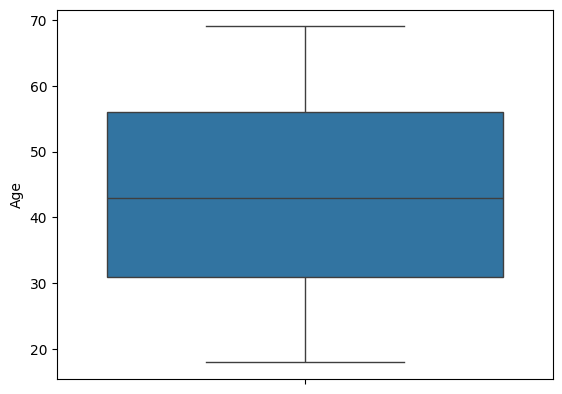

<Figure size 1000x1000 with 0 Axes>

Income


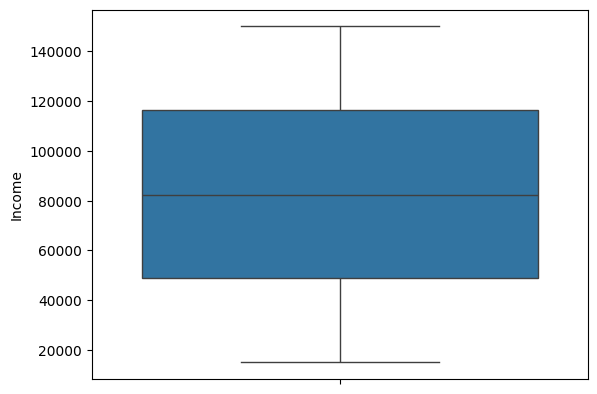

<Figure size 1000x1000 with 0 Axes>

LoanAmount


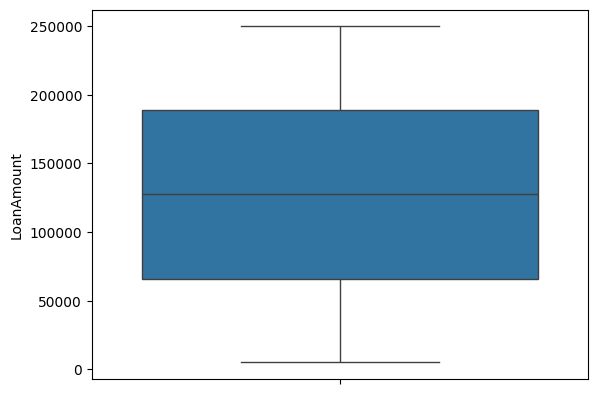

<Figure size 1000x1000 with 0 Axes>

CreditScore


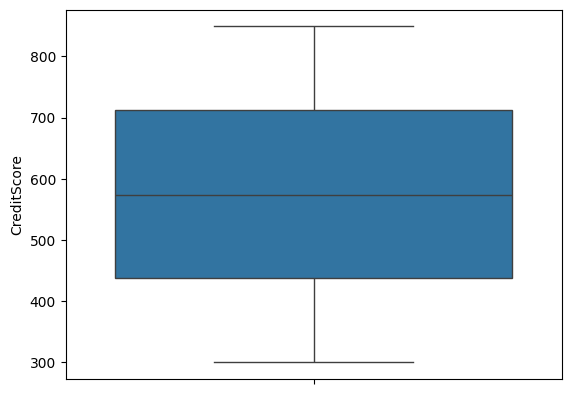

<Figure size 1000x1000 with 0 Axes>

MonthsEmployed


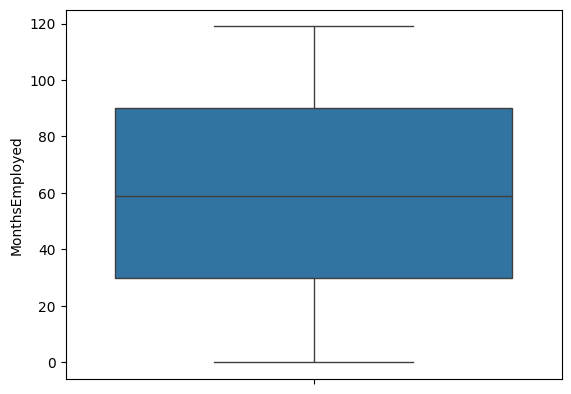

<Figure size 1000x1000 with 0 Axes>

NumCreditLines


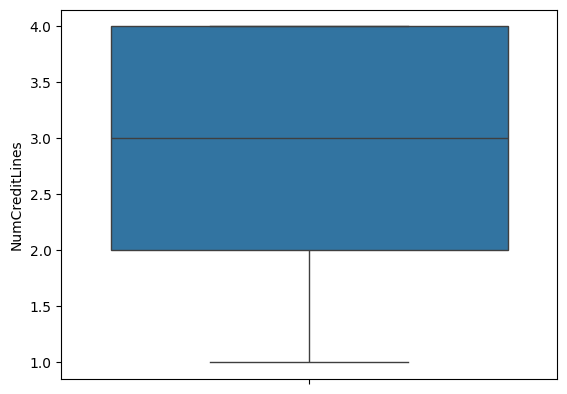

<Figure size 1000x1000 with 0 Axes>

InterestRate


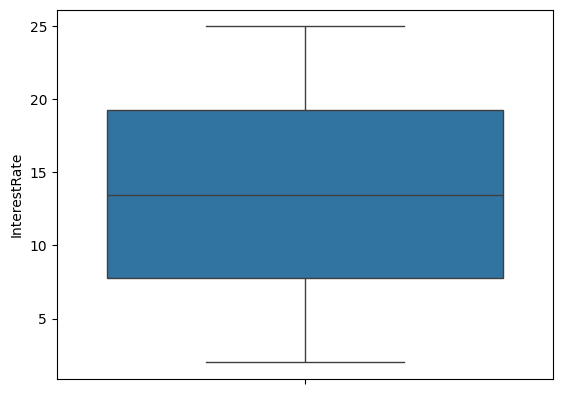

<Figure size 1000x1000 with 0 Axes>

LoanTerm


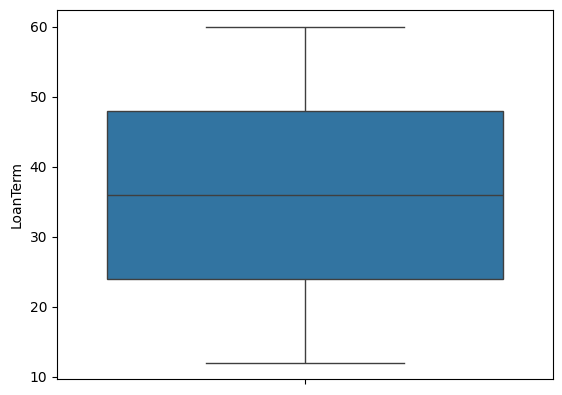

<Figure size 1000x1000 with 0 Axes>

In [8]:
for i, col in enumerate(train_df.columns[1:9]):

  sns.boxplot(train_df[col])

  plt.figure(figsize=(10, 10))
  print(col)

  plt.show()

All values lie within the minimum and maximum point of box plot and no outliers were found as seen. So no imputation required.

## Data Preprocessing

### Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

catergorical = [
    'Education','EmploymentType','MaritalStatus','HasMortgage',
    'HasDependents','LoanPurpose','HasCoSigner'
    ]

label_encoder = LabelEncoder()

Applied `LabelEncoder` to convert categorical variables (`Education`, `EmploymentType`, `MaritalStatus`, `HasMortgage`, `HasDependents`, `LoanPurpose`, `HasCoSigner`) into numerical format for model compatibility.

In [10]:
for col in catergorical:
    train_df[col] = label_encoder.fit_transform(train_df[col])

In [11]:
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1,0


### Covariance Matrix

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to standardize the features (mean = 0, std = 1)
sclar = StandardScaler()

cov = sclar.fit_transform(train_df.drop(columns=['LoanID']))
cov = pd.DataFrame(cov, columns=train_df.columns[1:])

cov_matrix = cov.cov()

# Display the covariance of the 'Default' feature with all other features, sorted in descending order
cov_matrix['Default'].sort_values(ascending=False)

Default           1.000005
InterestRate      0.129885
LoanAmount        0.085519
EmploymentType    0.042670
NumCreditLines    0.028565
DTIRatio          0.018596
LoanTerm          0.000815
MaritalStatus    -0.008441
LoanPurpose      -0.010799
HasMortgage      -0.021174
Education        -0.021508
CreditScore      -0.034128
HasDependents    -0.034737
HasCoSigner      -0.040688
MonthsEmployed   -0.095430
Income           -0.100515
Age              -0.167485
Name: Default, dtype: float64

### PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(cov)

PCA()

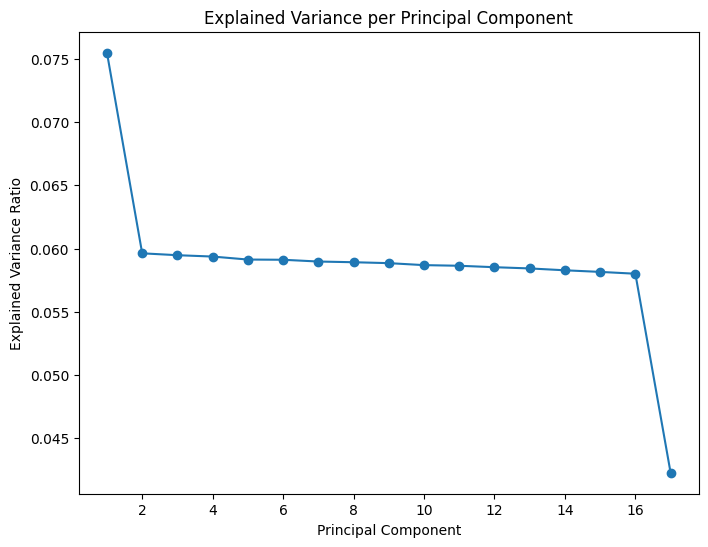

In [14]:
# Retrieve the explained variance ratio for each principal component from the PCA model
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))

# Plot the explained variance ratio for each principal component
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance per Principal Component')
plt.xlabel('Principal Component')

# Label the y-axis to indicate the proportion of variance explained
plt.ylabel('Explained Variance Ratio')

plt.show()

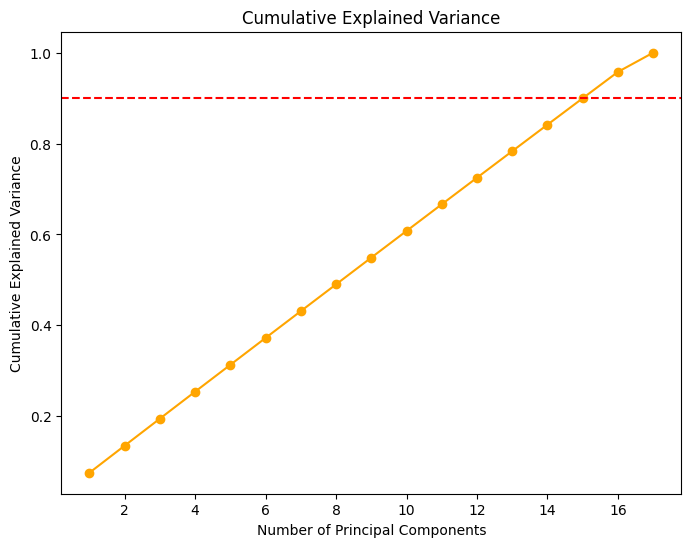

In [15]:
# Compute the cumulative explained variance by summing the explained variance ratios
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 6))
# Plot the cumulative explained variance against the number of principal components
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
# Label the y-axis to indicate the cumulative proportion of variance explained
plt.ylabel('Cumulative Explained Variance')

# Add a horizontal dashed line to mark the 90% variance threshold for reference
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

## Models Training

Splitting input dataset into training data and test data

In [16]:
from sklearn.model_selection import train_test_split

Y = train_df['Default']
X = train_df.drop(columns=['LoanID','Default'])

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25,random_state=42)

In [17]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (153207, 16)
y_train: (153207,)
x_test: (51070, 16)
y_test: (51070,)


In [18]:
test_df = pd.read_csv('test.csv')
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes


Encoding data to be predicted upon

In [19]:
loan_id = test_df['LoanID']
test_df = test_df.drop(columns=['LoanID'])

for col in catergorical:
    test_df[col] = label_encoder.fit_transform(test_df[col])

In [20]:
# Define the feature groups
continuous_features = [
    'Age', 'Income', 'LoanAmount', 'CreditScore',
    'MonthsEmployed', 'NumCreditLines', 'InterestRate',
    'LoanTerm', 'DTIRatio'
]

binary_features = [
    'HasMortgage', 'HasDependents', 'HasCoSigner'
]

discrete_features = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'LoanPurpose'
]

# Display the feature groups
print("Continuous Features:", continuous_features)
print("Binary Features:", binary_features)
print("Discrete Features:", discrete_features)

Continuous Features: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
Binary Features: ['HasMortgage', 'HasDependents', 'HasCoSigner']
Discrete Features: ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']


From covaraince matrix, we can see that default is comparibly more dependent on continous features like age, income and interest rate. So training by Gaussain Naive Bayes on continous features makes more sense rather than multinomial or bernoulli. 

### Gaussain Naive Bayes 

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train_continuous = x_train[continuous_features]
X_test_continuous = x_test[continuous_features]

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on continuous features
gnb.fit(X_train_continuous, y_train)

GaussianNB()

Validation

In [22]:
y_pred = gnb.predict(X_test_continuous)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naive Bayes on continuous features:", accuracy)

Accuracy of Gaussian Naive Bayes on continuous features: 0.88455061680047


Prediction

In [23]:
test_df_continuous = test_df[continuous_features]

# Predicting with the trained model
pred = gnb.predict(test_df_continuous)  

df = pd.DataFrame({
    'LoanID': loan_id,
    'Default': pred
})

# Save predictions to 'gb.csv' file
df.to_csv('gb.csv', index=False)

### K Nearest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [5, 7, 8],  
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1
)

In [25]:
# Fit the model to the training data
grid_search_knn.fit(x_train, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Cross-Validation Accuracy for KNN:", grid_search_knn.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
Best Cross-Validation Accuracy for KNN: 0.8823356596923272


Validation

In [26]:
# Predict on the test set using the best KNN model
knn_best_model = grid_search_knn.best_estimator_
y_pred = knn_best_model.predict(x_test)

# Evaluate the model's accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for KNN:", test_accuracy)

Test Accuracy for KNN: 0.8825925200704915


Prediciton

In [27]:
predictions = knn_best_model.predict(test_df)

output_df = pd.DataFrame({
    'LoanID': loan_id,
    'Default': predictions
})

# Save predictions to 'knn_predictions.csv' file
output_df.to_csv('knn_predictions.csv', index=False)

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#### Hyperparameter Tuning

In [29]:
# Define a Decision Tree Classifier and hyperparameter grid
base_clf = DecisionTreeClassifier()
param_grid = [
    {"max_depth": [None, 5, 10],
     "min_samples_split": [2, 3, 4],
     "min_samples_leaf": [1, 2, 4],
     "criterion": ['gini', 'entropy']
    }
]

# Perform grid search
grid_search = GridSearchCV(base_clf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)

# Train the model and find the best parameters
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


Validation

In [30]:
final_clf = grid_search.best_estimator_
final_clf.score(x_test,y_test)

0.8849030742118661

Training on entire dataset for better prediction

In [31]:
final_clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Prediction

In [32]:
pred = final_clf.predict(test_df)

df = pd.DataFrame({
    'LoanID': loan_id,
    'Default': pred
})

# Save predictions to 'decision.csv' file
df.to_csv('decision.csv', index=False)

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Set up parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [250, 300, 350],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [4, 6, 7],
}

# Initialize Random Forest classifier and perform grid search
rf_classifier = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, scoring='f1', cv=4, verbose=1, n_jobs=-1)

rf_grid_search.fit(x_train, y_train)

# Output best parameters and cross-validation score
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best F1 score for Random Forest:", rf_grid_search.best_score_)

Fitting 4 folds for each of 243 candidates, totalling 972 fits


/Users/anirudhpathaneni/Desktop/Predict_Defaulters/env/lib/python3.13/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'max_depth': 6, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 250}
Best F1 score for Random Forest: 0.06229688606985568


Validation

In [34]:
best_rf_model = rf_grid_search.best_estimator_
rf_predictions = best_rf_model.predict(x_test)

print("Random Forest Test F1 Score:", f1_score(y_test, rf_predictions))

Random Forest Test F1 Score: 0.06536366549182954


Training on entire dataset for better prediction

In [35]:
best_rf_model.fit(X, Y)

RandomForestClassifier(max_depth=6, max_features=None, min_samples_leaf=6,
                       n_estimators=250, random_state=42)

Prediction

In [36]:
predictions = best_rf_model.predict(test_df)

output_df = pd.DataFrame({
    'LoanID': loan_id,  
    'Default': predictions                    
})

# Save the predictions to a rfc.csv file
output_df.to_csv('rfc.csv', index=False)

### XGBoost

In [37]:
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(eval_metric="logloss")

# Define hyperparameter grid
param_grid2 = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.6, 0.7, 0.8],
    "max_depth": [3, 5, 10],
    'min_child_weight': [5, 10, 12],
    'gamma': [0, 0.1, 0.5, 1]
}

# Perform grid search 
grid_search2 = GridSearchCV(estimator=xgb_clf, cv=4, param_grid=param_grid2, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search2.fit(x_train, y_train)

Fitting 4 folds for each of 972 candidates, totalling 3888 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 10],
                         'min_child_weight': [5, 10, 12],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.7, 0.8]},
             scoring='accuracy', verbose=1)

Validation

In [38]:
grid_search2.best_params_
final_xgb_clf = grid_search2.best_estimator_
final_xgb_clf.score(x_test,y_test)

0.8859996083806541

Training on entire dataset for better prediction

In [39]:
final_xgb_clf.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Prediction

In [40]:
pred2 = final_xgb_clf.predict(test_df)

df2 = pd.DataFrame({
    'LoanID': loan_id,
    'Default': pred2
})

# Save predictions to 'xgboosting.csv' file
df2.to_csv('xgboosting.csv', index=False)